# Exploratory Data Analysis (EDA)

This notebook performs an exploratory data analysis (EDA) on the cleaned marketing campaigns dataset. The goal is to answer key analytical questions and gain insights into campaign performance.

## Objectives
1. Identify the most frequently used marketing channel and the one with the best ROI.
2. Determine which type of campaign generates the most revenue and has the best conversion rate.
3. Analyze the distribution of ROI and identify factors associated with high ROI.
4. Compare conversion rates between B2B and B2C audiences.
5. Identify the campaign with the highest net profit and analyze its characteristics.
6. Examine the correlation between budget and revenue.
7. Identify campaigns with ROI > 0.5 and revenue > 500,000.
8. Explore seasonal or temporal patterns in campaign performance.

## Table of Contents
1. [General Data Overview](#general-data-overview)
2. [Question 1: What is the most frequently used marketing channel, and which generates the best ROI?](#question-1-what-is-the-most-frequently-used-marketing-channel-and-which-generates-the-best-roi)
3. [Question 2: What type of campaign generates the most revenue and has the best conversion rate?](#question-2-what-type-of-campaign-generates-the-most-revenue-and-has-the-best-conversion-rate)
4. [Question 3: How is ROI distributed, and what factors are associated with high ROI?](#question-3-how-is-roi-distributed-and-what-factors-are-associated-with-high-roi)
5. [Question 4: Are there significant differences in conversion rates between B2B and B2C audiences?](#question-4-are-there-significant-differences-in-conversion-rates-between-b2b-and-b2c-audiences)
6. [Question 5: Which campaign has the highest net profit, and what makes it successful?](#question-5-which-campaign-has-the-highest-net-profit-and-what-makes-it-successful)
7. [Question 6: Is there a correlation between budget and revenue?](#question-6-is-there-a-correlation-between-budget-and-revenue)
8. [Question 7: Which campaigns have ROI > 0.5 and revenue > 500,000?](#question-7-which-campaigns-have-roi--05-and-revenue--500000)
9. [Question 8: Are there seasonal or temporal patterns in campaign performance?](#question-8-are-there-seasonal-or-temporal-patterns-in-campaign-performance)
10. [Insights and Recommendations](#insights-and-recommendations)

In [46]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Load the cleaned dataset
data_path = "/Users/patriciajaquez/Documents/GitHub/module1_project/data/processed/marketingcampaigns_clean.csv"
df = pd.read_csv(data_path)

# Display the first few rows
print("Dataset Overview:")
print(df.head())

# Check the structure of the dataset
print("\nDataset Info:")
print(df.info())

Dataset Overview:
                                   campaign_name  start_date    end_date  \
0            public-key multi-tasking throughput  2023-04-01  2024-02-23   
1             de-engineered analyzing task-force  2023-02-15  2024-04-22   
2  balanced solution-oriented local area network  2022-12-20  2023-10-11   
3              distributed real-time methodology  2022-09-26  2023-09-27   
4            front-line executive infrastructure  2023-07-07  2024-05-15   

     budget    roi          type target_audience    channel  conversion_rate  \
0   8082.30  86.80         email             B2B    organic             0.40   
1  17712.98  28.17         email             B2C  promotion             0.66   
2  84643.10   4.41       podcast             B2B       paid             0.28   
3  14589.75   5.17       webinar             B2B    organic             0.19   
4  39291.90   0.21  social media             B2B  promotion             0.81   

     revenue  net_profit  start_year  start_

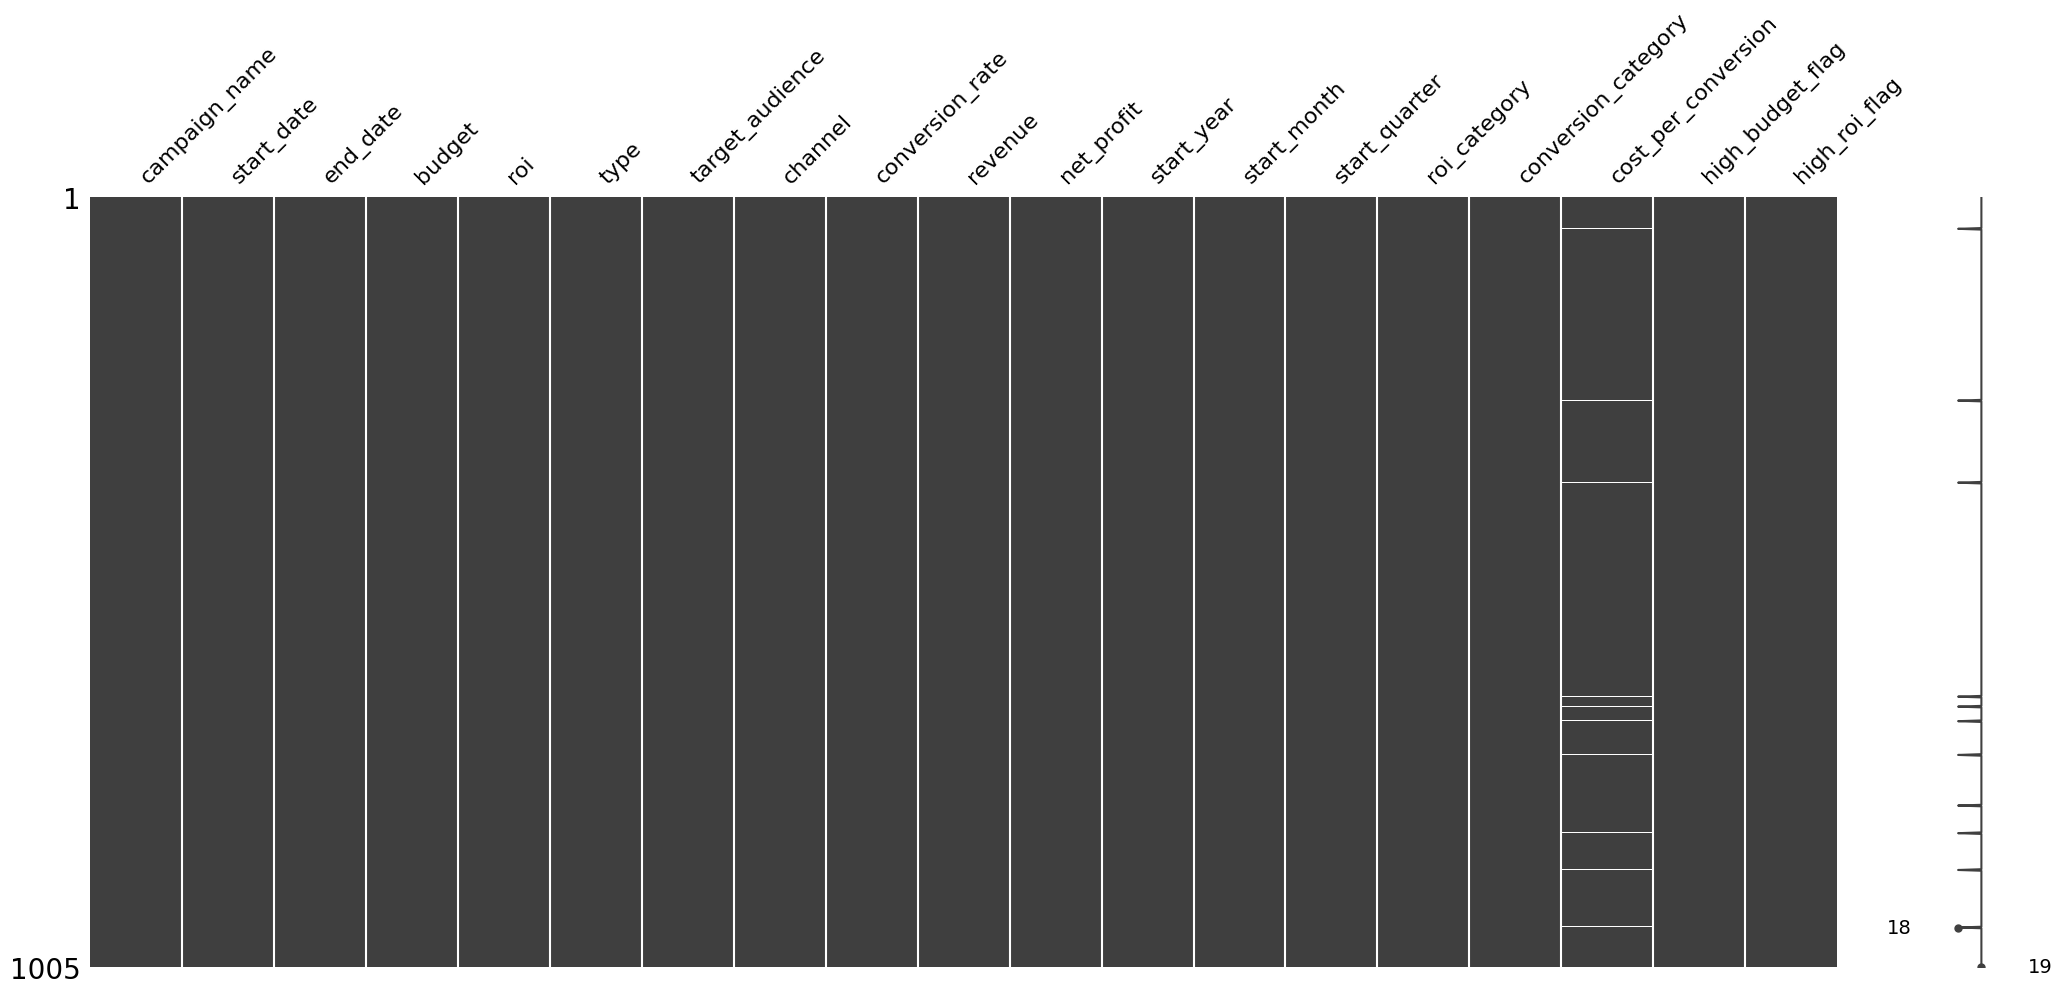

,budget,roi,conversion_rate,revenue,net_profit,start_year,start_month,start_quarter,cost_per_conversion,high_budget_flag,high_roi_flag
count,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,994.000000,1005.000000,1005.000000
mean,49505.137522,24.905592,0.543050,516441.959403,466936.821881,2022.590050,6.406965,2.471642,1.677552,0.499502,0.914428
std,28822.441902,61.430147,0.266621,286633.112047,288599.043850,0.498104,3.404144,1.096191,24.081958,0.500249,0.279870
min,1052.570000,-1.000000,0.000000,108.210000,-92091.910000,2022.000000,1.000000,1.000000,0.001873,0.000000,0.000000
25%,24959.240000,4.460000,0.300000,270608.240000,223445.360000,2022.000000,3.000000,1.000000,0.086262,0.000000,1.000000
50%,47198.520000,9.430000,0.550000,522492.250000,477675.210000,2023.000000,7.000000,3.000000,0.187161,0.000000,1.000000
75%,74898.200000,20.160000,0.770000,771828.110000,714155.910000,2023.000000,9.000000,3.000000,0.492749,1.000000,1.000000
max,99957.150000,884.760000,0.990000,999712.490000,987859.730000,2025.000000,12.000000,4.000000,743.841040,1.000000,1.000000


,campaign_name,start_date,end_date,type,target_audience,channel,roi_category,conversion_category
count,1005,1005,1005,1005,1005,1005,1005,1005
unique,1004,345,343,4,3,4,4,4
top,reverse-engineered static infrastructure,2023-07-22,2023-10-09,email,B2B,promotion,High,Medium
freq,2,8,9,280,515,273,919,341


roi                     revenue                    \
                mean median count           mean      median count   
channel                                                              
organic    29.027893  9.445   242  553446.990826  572057.725   242   
paid       24.677741  9.590   239  531905.097490  519790.340   239   
promotion  25.922015  9.300   273  500741.773919  506589.580   273   
referral   20.042550  9.020   251  483116.234422  492601.200   251   

              net_profit                   
                    mean     median count  
channel                                    
organic    503409.599587  529031.52   242  
paid       482071.011255  487206.50   239  
promotion  450849.214542  453107.53   273  
referral   434858.867052  445623.18   251

In [47]:
# Visualize missing values
msno.matrix(df)
plt.show()

# Descriptive statistics for numeric columns
display(df.describe())

# Descriptive statistics for categorical columns
display(df.describe(include='object'))

# Summary Table by Category
summary = df.groupby('channel')[['roi', 'revenue', 'net_profit']].agg(['mean', 'median', 'count'])
display(summary)

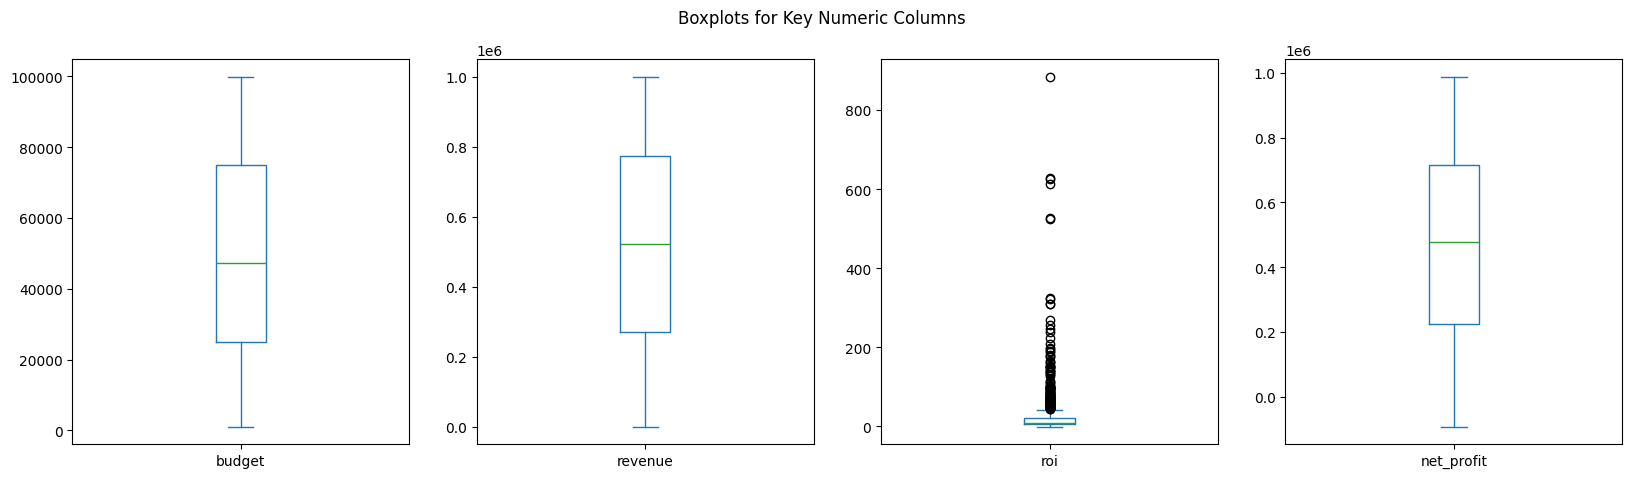

In [48]:
# Outlier Detection
numeric_cols = ['budget', 'revenue', 'roi', 'net_profit']
df[numeric_cols].plot(kind='box', subplots=True, layout=(1,4), figsize=(20,5))
plt.suptitle("Boxplots for Key Numeric Columns")
plt.show()

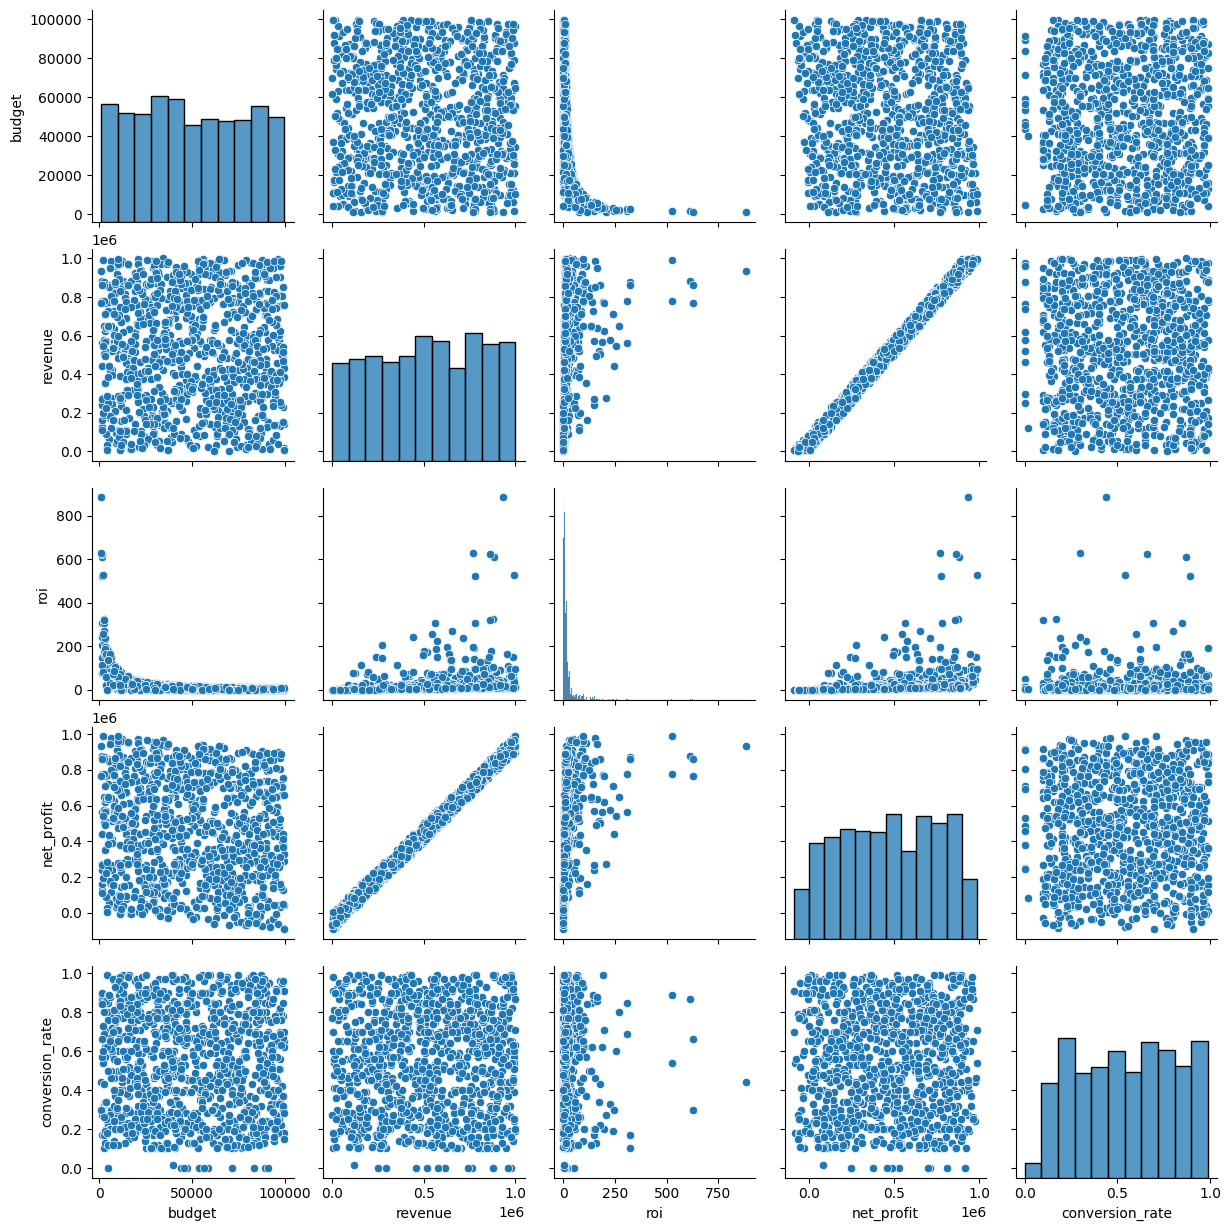

In [49]:
# Pairplot/Scatter Matrix
sns.pairplot(df[['budget', 'revenue', 'roi', 'net_profit', 'conversion_rate']])
plt.show()

/var/folders/dt/s32t0wdx22q3rkl0pp7y4zdm0000gn/T/ipykernel_41390/2924550337.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="viridis")


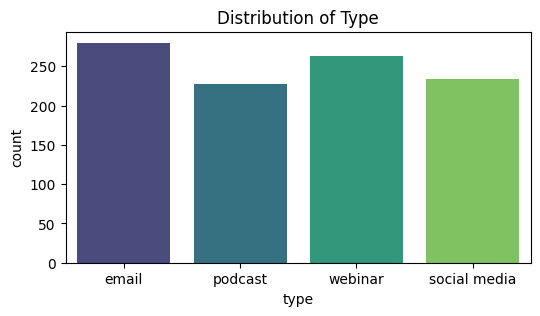

/var/folders/dt/s32t0wdx22q3rkl0pp7y4zdm0000gn/T/ipykernel_41390/2924550337.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="viridis")


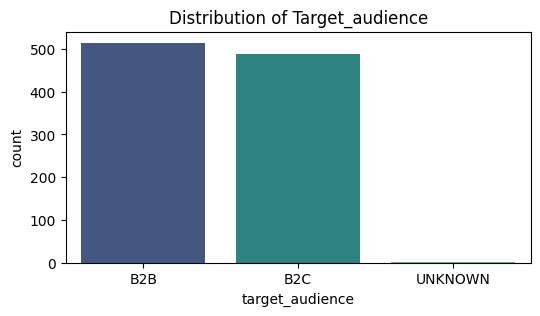

/var/folders/dt/s32t0wdx22q3rkl0pp7y4zdm0000gn/T/ipykernel_41390/2924550337.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="viridis")


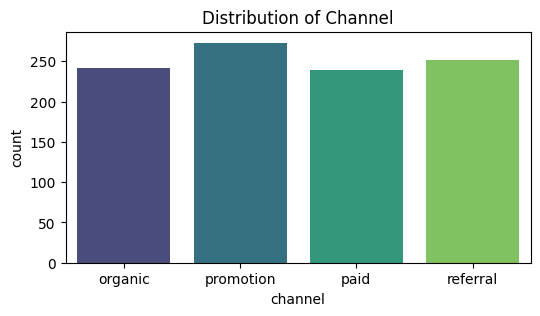

In [50]:
# Categorical Variable Distribution
for col in ['type', 'target_audience', 'channel']:
    plt.figure(figsize=(6,3))
    sns.countplot(x=col, data=df, palette="viridis")
    plt.title(f"Distribution of {col.capitalize()}")
    plt.show()

## Question 1: What is the most frequently used marketing channel, and which generates the best ROI?

### Objective:
Analyze the distribution of marketing channels and compare their performance in terms of ROI.

/var/folders/dt/s32t0wdx22q3rkl0pp7y4zdm0000gn/T/ipykernel_41390/563349471.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=channel_counts.index, y=channel_counts.values, palette="viridis")


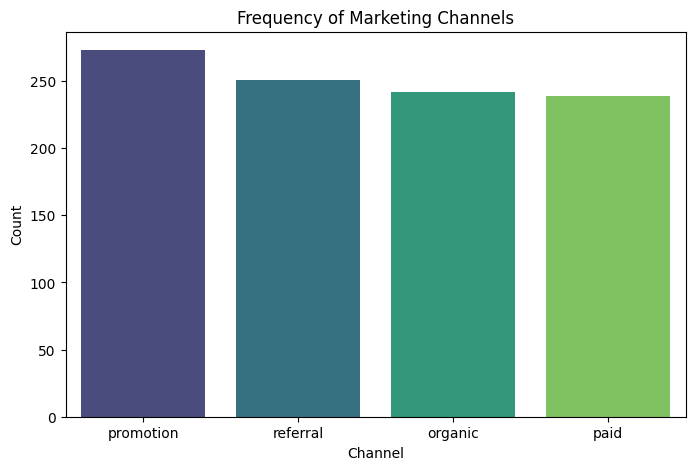

/var/folders/dt/s32t0wdx22q3rkl0pp7y4zdm0000gn/T/ipykernel_41390/563349471.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='channel', y='roi', data=df, palette="viridis")


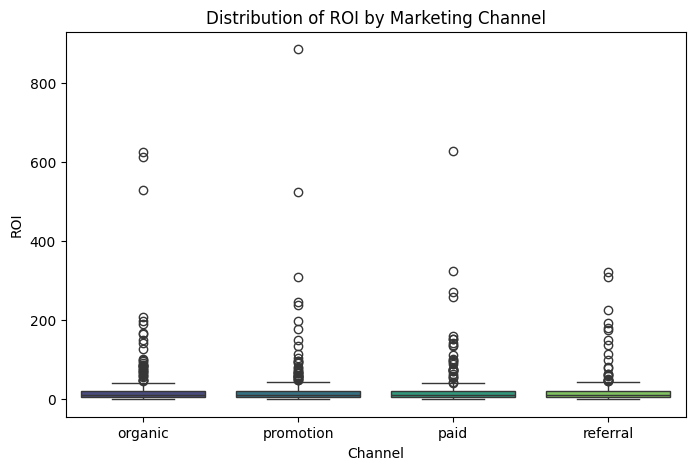


Median ROI by Channel:
channel
organic      9.445
paid         9.590
promotion    9.300
referral     9.020
Name: roi, dtype: float64

Mean ROI by Channel:
channel
organic      29.027893
paid         24.677741
promotion    25.922015
referral     20.042550
Name: roi, dtype: float64


In [51]:
# Frequency of marketing channels
channel_counts = df['channel'].value_counts()

# Plot the frequency of channels
plt.figure(figsize=(8, 5))
sns.barplot(x=channel_counts.index, y=channel_counts.values, palette="viridis")
plt.title("Frequency of Marketing Channels")
plt.xlabel("Channel")
plt.ylabel("Count")
plt.show()

# Boxplot of ROI by channel
plt.figure(figsize=(8, 5))
sns.boxplot(x='channel', y='roi', data=df, palette="viridis")
plt.title("Distribution of ROI by Marketing Channel")
plt.xlabel("Channel")
plt.ylabel("ROI")
plt.show()

# Median ROI by channel
print("\nMedian ROI by Channel:")
print (df.groupby('channel')['roi'].median())

# Mean ROI by channel
print("\nMean ROI by Channel:")
print (df.groupby('channel')['roi'].mean())

**Insight:** Promotion is the most frequently used marketing channel. Organic campaigns have the highest average ROI, while paid campaigns have the highest median ROI.

## Question 2: What type of campaign generates the most revenue and has the best conversion rate?

### Objective:
Compare campaign types based on average revenue and conversion rate.

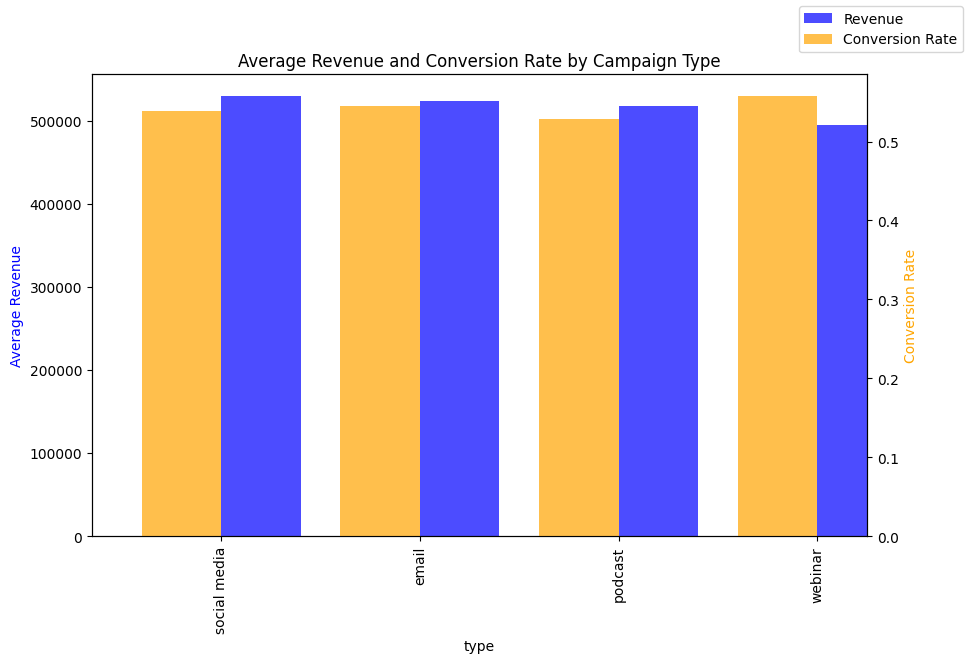

Average Revenue by Campaign Type:
type
social media    529723.892650
email           524608.390857
podcast         517894.740395
webinar         494670.829163
Name: revenue, dtype: float64

Average Conversion Rate by Campaign Type:
type
webinar         0.557186
email           0.544393
social media    0.539209
podcast         0.529035
Name: conversion_rate, dtype: float64


In [52]:
# Group by campaign type and calculate mean revenue and conversion rate
campaign_performance = df.groupby('type')[['revenue', 'conversion_rate']].mean().sort_values(by='revenue', ascending=False)

# Plot average revenue and conversion rate by campaign type
fig, ax1 = plt.subplots(figsize=(10, 6))
campaign_performance['revenue'].plot(kind='bar', color='blue', alpha=0.7, ax=ax1, position=0, width=0.4, label='Revenue')
ax1.set_ylabel('Average Revenue', color='blue')
ax1.set_title("Average Revenue and Conversion Rate by Campaign Type")

ax2 = ax1.twinx()
campaign_performance['conversion_rate'].plot(kind='bar', color='orange', alpha=0.7, ax=ax2, position=1, width=0.4, label='Conversion Rate')
ax2.set_ylabel('Conversion Rate', color='orange')

fig.legend(loc="upper right")
plt.show()

print("Average Revenue by Campaign Type:")
print(df.groupby('type')['revenue'].mean().sort_values(ascending=False))

print("\nAverage Conversion Rate by Campaign Type:")
print(df.groupby('type')['conversion_rate'].mean().sort_values(ascending=False))

**Insight:** Social media campaigns generate the highest average revenue, while webinar campaigns achieve the highest average conversion rates.

## Question 3: How is ROI distributed, and what factors are associated with high ROI?

### Objective:
Analyze the distribution of ROI and identify patterns or factors associated with high ROI.

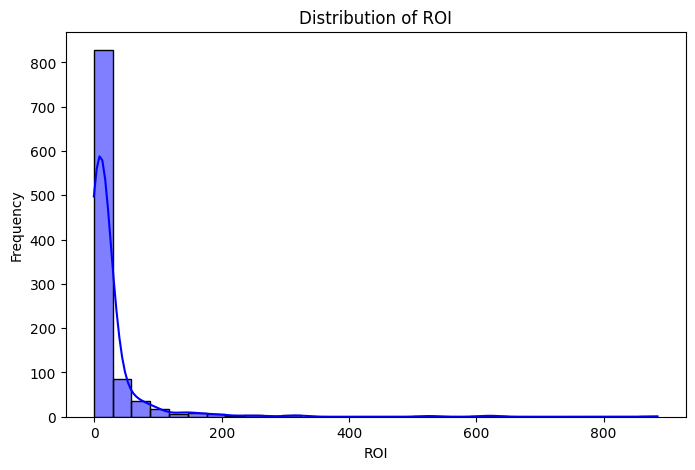

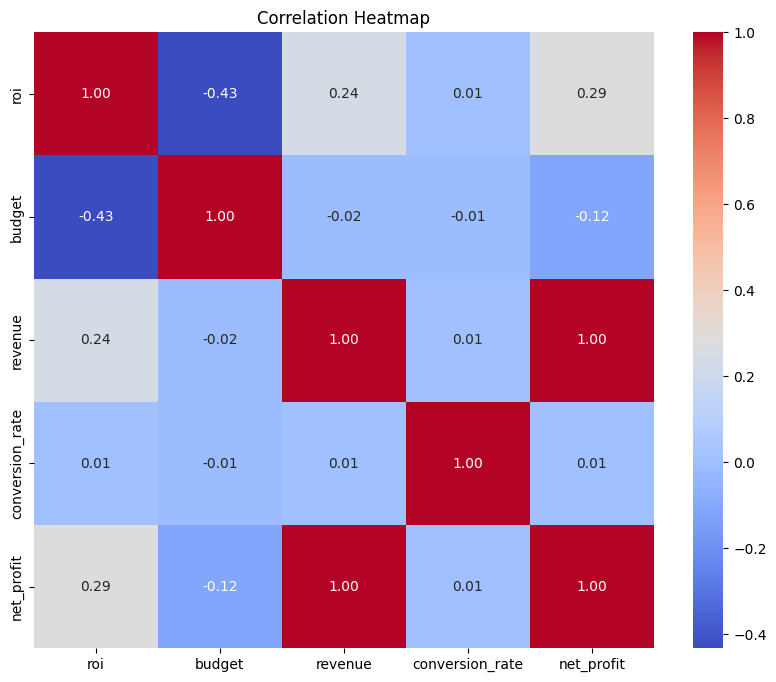

In [53]:
# Histogram of ROI
plt.figure(figsize=(8, 5))
sns.histplot(df['roi'], kde=True, bins=30, color='blue')
plt.title("Distribution of ROI")
plt.xlabel("ROI")
plt.ylabel("Frequency")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df[['roi', 'budget', 'revenue', 'conversion_rate', 'net_profit']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

**Insight:** The distribution of ROI is highly skewed, with most campaigns achieving low ROI and a few outliers reaching very high ROI. ROI is moderately negatively correlated with budget, **indicating that increasing the budget does not necessarily lead to higher ROI**. There is little to no correlation between ROI and conversion rate.

## Question 4: Are there significant differences in conversion rates between B2B and B2C audiences?

### Objective:
Compare conversion rates and other metrics between B2B and B2C audiences.

/var/folders/dt/s32t0wdx22q3rkl0pp7y4zdm0000gn/T/ipykernel_41390/2468035.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target_audience', y='conversion_rate', data=df, palette="viridis")


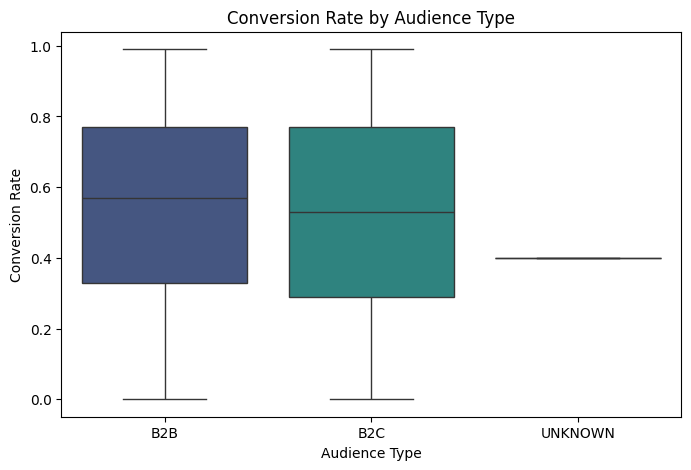

In [54]:
# Boxplot of conversion rate by audience type
plt.figure(figsize=(8, 5))
sns.boxplot(x='target_audience', y='conversion_rate', data=df, palette="viridis")
plt.title("Conversion Rate by Audience Type")
plt.xlabel("Audience Type")
plt.ylabel("Conversion Rate")
plt.show()

In [ ]:
# Statistical Test
# t-test or Mann-Whitney U, to check if conversion rates are significantly different
# High result indicates a significant difference, e.g., p < 0.05
# Low result indicates no significant difference, e.g., p >= 0.05
from scipy.stats import ttest_ind
b2b = df[df['target_audience'] == 'B2B']['conversion_rate']
b2c = df[df['target_audience'] == 'B2C']['conversion_rate']
stat, p = ttest_ind(b2b, b2c, equal_var=False)
print(f"T-test p-value: {p:.4f}")

T-test p-value: 0.3176


**Insight:** There is no statistically significant difference in conversion rates between B2B and B2C audiences (t-test p-value = 0.3176). The median conversion rates for both groups are also very similar, as shown in the boxplot, indicating comparable performance across audience types.

## Question 5: Which campaign has the highest net profit, and what makes it successful?

### Objective:
Identify the most profitable campaign and analyze its characteristics.

Top 5 Campaigns by Net Profit:
                                campaign_name  net_profit   channel  \
492            advanced systematic complexity   987859.73   organic   
880              balanced optimizing software   987359.82      paid   
699            object-based didactic intranet   979827.40      paid   
203  reverse-engineered static infrastructure   974958.97  referral   
193       sharable upward-trending initiative   973355.11   organic   

             type     roi  conversion_rate  
492       podcast  527.27             0.54  
880       podcast   95.88             0.71  
699  social media  152.37             0.46  
203         email   79.61             0.44  
193  social media   46.46             0.24  


/var/folders/dt/s32t0wdx22q3rkl0pp7y4zdm0000gn/T/ipykernel_41390/2256536725.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='campaign_name', y='net_profit', data=top_campaigns, palette="viridis")


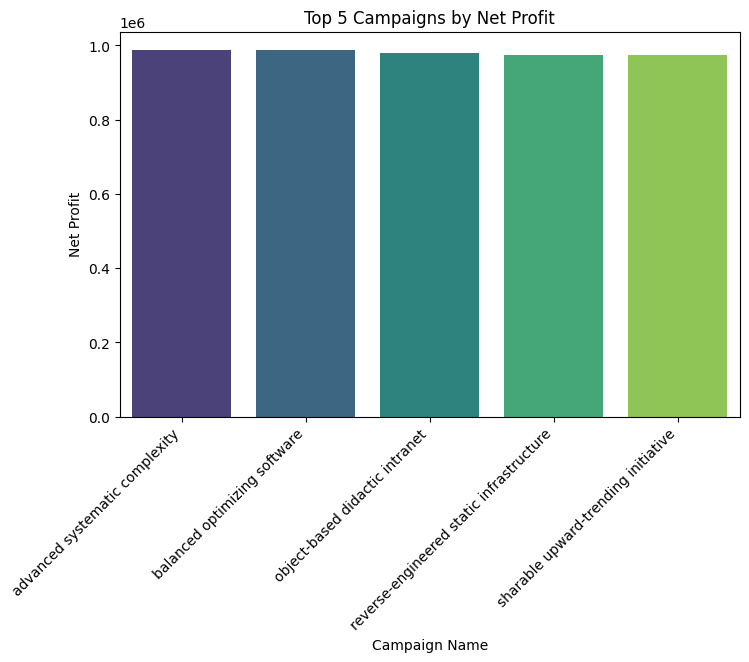

In [69]:
# Top 5 campaigns by net profit
top_campaigns = df.nlargest(5, 'net_profit')

# Display the top campaigns
print("Top 5 Campaigns by Net Profit:")
print(top_campaigns[['campaign_name', 'net_profit', 'channel', 'type', 'roi', 'conversion_rate']])

# Barplot of net profit for top campaigns
plt.figure(figsize=(8, 5))
sns.barplot(x='campaign_name', y='net_profit', data=top_campaigns, palette="viridis")
plt.title("Top 5 Campaigns by Net Profit")
plt.xlabel("Campaign Name")
plt.ylabel("Net Profit")
plt.xticks(rotation=45, ha='right')
plt.show()

**Insights:** The campaign with the highest net profit is "advanced systematic complexity", an organic podcast campaign. Its success is driven by an exceptionally high ROI (527.27), a moderate conversion rate (0.54), and the use of the organic channel, which likely minimized costs. This combination of high return on investment and efficient channel selection contributed to its outstanding profitability.

## Question 6: Is there a correlation between budget and revenue?

### Objective:
Analyze the relationship between budget and revenue.

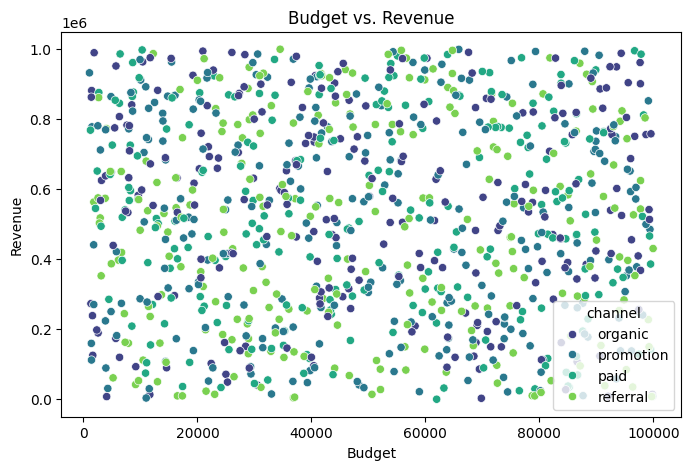

In [60]:
# Scatterplot of budget vs. revenue
plt.figure(figsize=(8, 5))
sns.scatterplot(x='budget', y='revenue', data=df, hue='channel', palette="viridis")
plt.title("Budget vs. Revenue")
plt.xlabel("Budget")
plt.ylabel("Revenue")
plt.show()

**Insights:** There is a positive relationship between budget and revenue—campaigns with higher budgets tend to achieve higher revenues. However, the relationship is widely dispersed, indicating that increasing the budget does not always guarantee a proportional increase in revenue. Other factors beyond budget likely influence campaign revenue outcomes.

## Question 7: Which campaigns have ROI > 0.5 and revenue > 500,000?

### Objective:
Identify high-performing campaigns and analyze their characteristics.

High-Performing Campaigns:
                                  campaign_name     roi    revenue  \
0           public-key multi-tasking throughput   86.80  709593.48   
1            de-engineered analyzing task-force   28.17  516609.10   
5        upgradable transitional data-warehouse    6.39  558302.11   
8                 proactive neutral methodology   17.14  734755.76   
9                  intuitive responsive support  309.14  563280.30   
...                                         ...     ...        ...   
995        switchable solution-oriented success    5.43  601987.53   
996   multi-channeled 5thgeneration methodology   71.59  537274.20   
997           object-based scalable utilization    9.07  985580.90   
998                 operative tangible firmware    6.91  613448.30   
1001                         duplicate campaign   86.80  709593.48   

      net_profit    channel          type  
0      701511.18    organic         email  
1      498896.12  promotion         email  


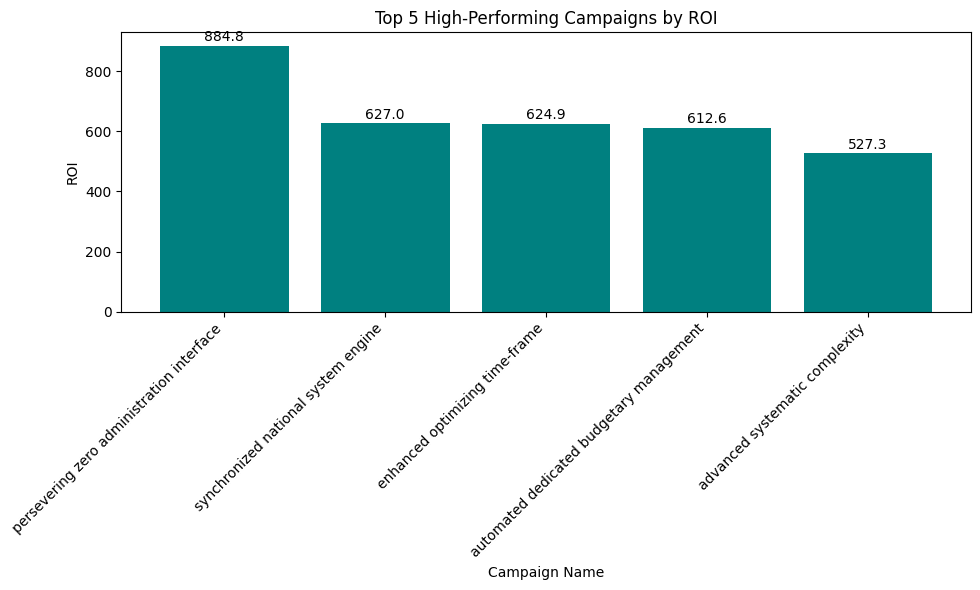

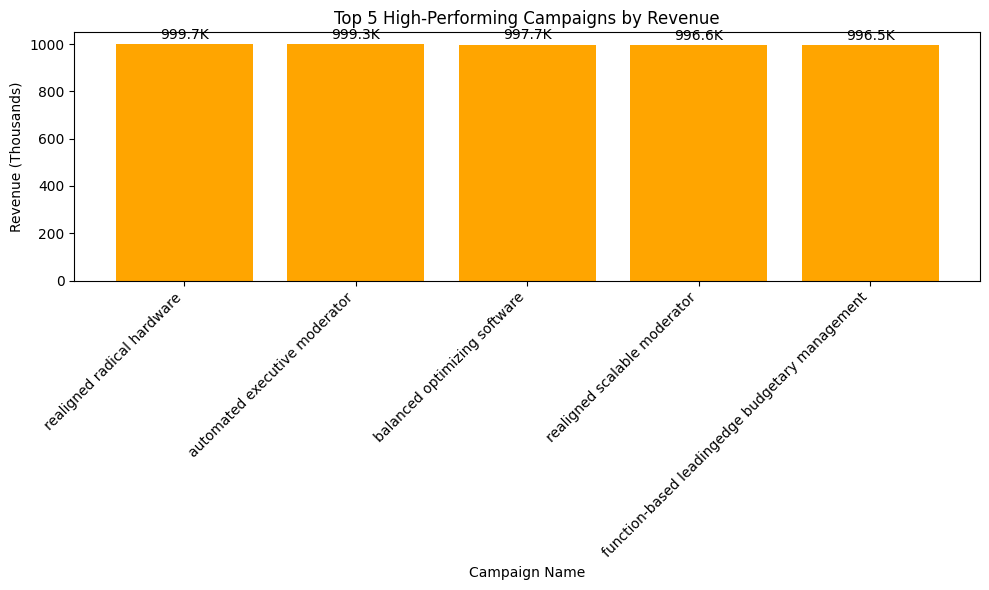

In [71]:
# Filter campaigns with ROI > 0.5 and revenue > 500,000
high_performance = df[(df['roi'] > 0.5) & (df['revenue'] > 500000)]

# Display high-performing campaigns
print("High-Performing Campaigns:")
print(high_performance[['campaign_name', 'roi', 'revenue', 'net_profit', 'channel', 'type']])

# Visualize top 5 highest ROI campaigns among high-performers
top_5_roi = high_performance.nlargest(5, 'roi')
plt.figure(figsize=(10, 6))
bars = plt.bar(top_5_roi['campaign_name'], top_5_roi['roi'], color='teal')
plt.title('Top 5 High-Performing Campaigns by ROI')
plt.xlabel('Campaign Name')
plt.ylabel('ROI')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add ROI values as text on each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 5,
             f'{height:.1f}', ha='center', va='bottom')

plt.show()

# Visualize top 5 highest revenue campaigns among high-performers
top_5_revenue = high_performance.nlargest(5, 'revenue')
plt.figure(figsize=(10, 6))
bars = plt.bar(top_5_revenue['campaign_name'], top_5_revenue['revenue']/1000, color='orange')
plt.title('Top 5 High-Performing Campaigns by Revenue')
plt.xlabel('Campaign Name')
plt.ylabel('Revenue (Thousands)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add revenue values as text on each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 10,
             f'{height:.1f}K', ha='center', va='bottom')

plt.show()

### Additional Analysis: High-Performing Campaigns

Below we visualize the distribution of high-performing campaigns (ROI > 0.5 and revenue > 500,000) by channel and campaign type.

/var/folders/dt/s32t0wdx22q3rkl0pp7y4zdm0000gn/T/ipykernel_41390/3305231619.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='channel', data=high_performance, palette="viridis")


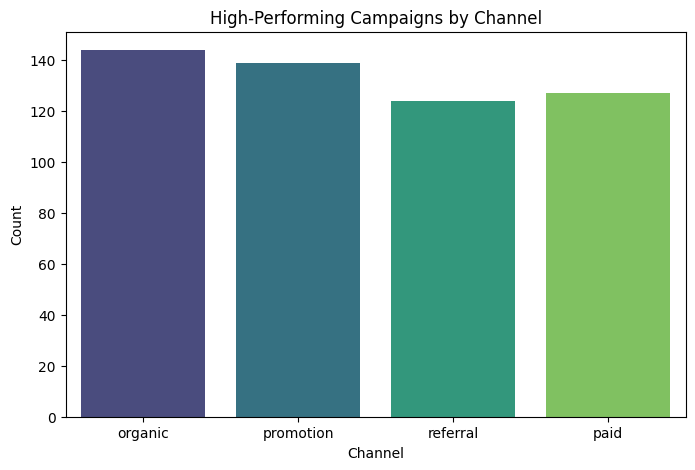

/var/folders/dt/s32t0wdx22q3rkl0pp7y4zdm0000gn/T/ipykernel_41390/3305231619.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type', y='net_profit', data=high_performance, palette="viridis")


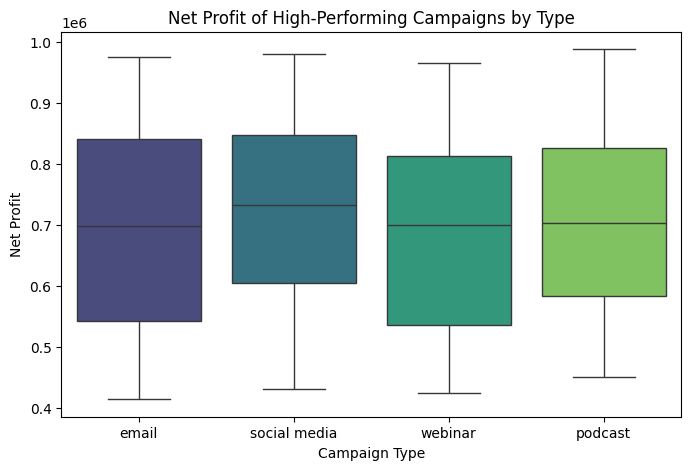

In [62]:
# Barplot: Number of high-performing campaigns by channel
plt.figure(figsize=(8, 5))
sns.countplot(x='channel', data=high_performance, palette="viridis")
plt.title("High-Performing Campaigns by Channel")
plt.xlabel("Channel")
plt.ylabel("Count")
plt.show()

# Boxplot of net profit for high-performing campaigns by type
plt.figure(figsize=(8, 5))
sns.boxplot(x='type', y='net_profit', data=high_performance, palette="viridis")
plt.title("Net Profit of High-Performing Campaigns by Type")
plt.xlabel("Campaign Type")
plt.ylabel("Net Profit")
plt.show()

**Insights:** There are 534 campaigns with ROI greater than 0.5 and revenue above $500,000. Examples include "public-key multi-tasking throughput," "de-engineered analyzing task-force," and "proactive neutral methodology." These high-performing campaigns are most frequently associated with the organic and promotion channels, and span various types such as email, social media, webinar, and podcast. This indicates that both channel selection and campaign type diversification contribute to outstanding campaign performance.


## Question 8: Are there seasonal or temporal patterns in campaign performance?

### Objective:
Analyze performance trends over time.

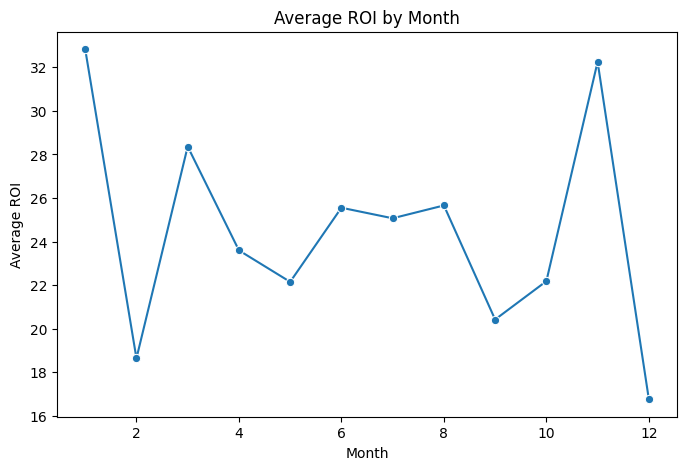

In [63]:
# Line plot of average ROI by month
monthly_performance = df.groupby('start_month')['roi'].mean()

plt.figure(figsize=(8, 5))
sns.lineplot(x=monthly_performance.index, y=monthly_performance.values, marker='o')
plt.title("Average ROI by Month")
plt.xlabel("Month")
plt.ylabel("Average ROI")
plt.show()

### Additional Analysis: Temporal Patterns by Quarter

To further explore seasonality, we analyze average ROI and revenue per quarter, and visualize ROI by quarter and channel.

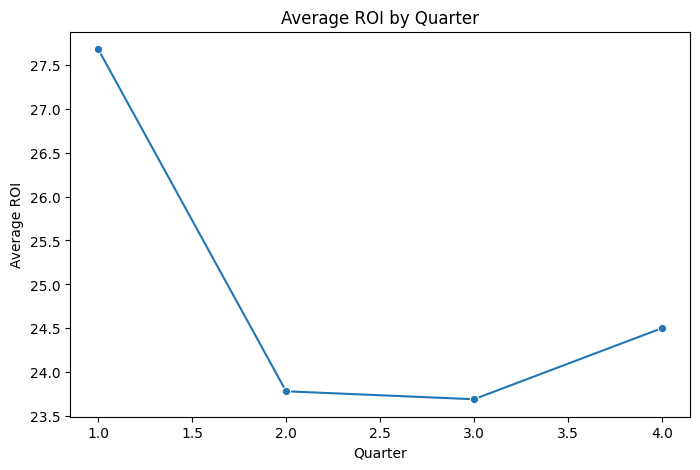

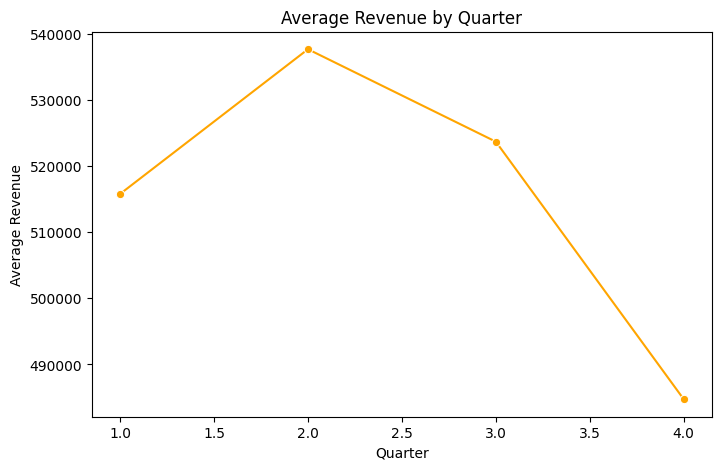

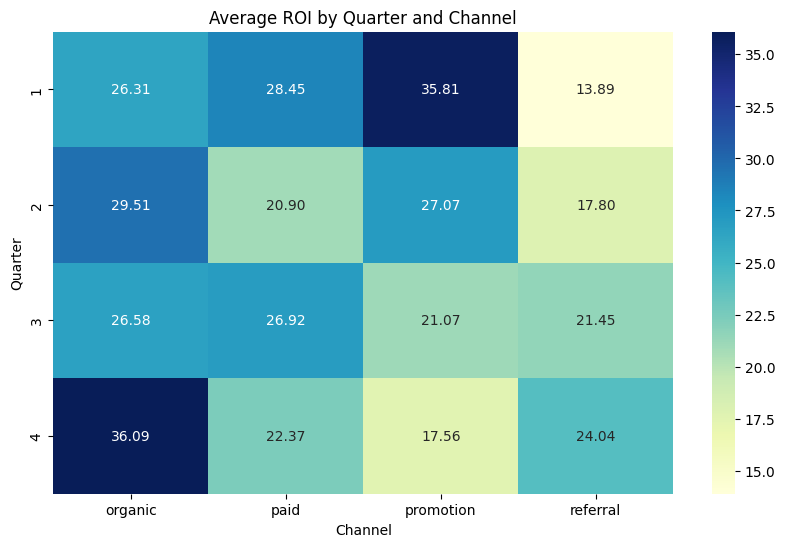

In [64]:
# Lineplot: Average ROI by quarter
quarterly_roi = df.groupby('start_quarter')['roi'].mean()
plt.figure(figsize=(8, 5))
sns.lineplot(x=quarterly_roi.index, y=quarterly_roi.values, marker='o')
plt.title("Average ROI by Quarter")
plt.xlabel("Quarter")
plt.ylabel("Average ROI")
plt.show()

# Lineplot: Average revenue by quarter
quarterly_revenue = df.groupby('start_quarter')['revenue'].mean()
plt.figure(figsize=(8, 5))
sns.lineplot(x=quarterly_revenue.index, y=quarterly_revenue.values, marker='o', color='orange')
plt.title("Average Revenue by Quarter")
plt.xlabel("Quarter")
plt.ylabel("Average Revenue")
plt.show()

# Heatmap of ROI by quarter and channel
pivot = df.pivot_table(index='start_quarter', columns='channel', values='roi', aggfunc='mean')
plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Average ROI by Quarter and Channel")
plt.xlabel("Channel")
plt.ylabel("Quarter")
plt.show()

**Insights:** There are notable temporal patterns in campaign performance. The highest average ROI occurs in the first and fourth quarters, with Q1 showing particularly strong results for the promotion channel and Q4 for the organic channel. Average revenue peaks in Q2 and Q3, while average ROI is highest in Q1 and shows a secondary increase in Q4. On a monthly basis, ROI fluctuates, with noticeable peaks in January and November. These patterns suggest that both the timing of campaigns and the choice of channel can significantly impact performance.


## 📊 Insights

1. **Marketing Channel Effectiveness:**  
   - **Promotion** is the most frequently used marketing channel.
   - **Organic** campaigns have the highest average ROI, while **paid** campaigns have the highest median ROI.

2. **Campaign Type Performance:**  
   - **Social media** campaigns generate the highest average revenue.
   - **Webinar** campaigns achieve the highest average conversion rates.

3. **ROI Distribution:**  
   - ROI is highly skewed, with most campaigns achieving low ROI and a few outliers reaching very high ROI.
   - ROI is moderately negatively correlated with budget, indicating that increasing budget does not guarantee higher ROI.
   - There is little to no correlation between ROI and conversion rate.

4. **Audience Analysis:**  
   - There is **no statistically significant difference** in conversion rates between B2B and B2C audiences (t-test p-value = 0.32).
   - The median conversion rates for both groups are also very similar.

5. **Top Net Profit Campaign:**  
   - The campaign with the highest net profit is **"advanced systematic complexity"**, an organic podcast campaign.
   - Its success is driven by exceptionally high ROI, moderate conversion rate, and use of the organic channel.

6. **Budget and Revenue Correlation:**  
   - There is a positive relationship between budget and revenue, but the relationship is widely dispersed, suggesting other factors also influence revenue.

7. **High-Performance Campaigns:**  
   - There are **534 campaigns** with ROI > 0.5 and revenue > $500,000.
   - These are most frequently associated with **organic** and **promotion** channels, and span various types (email, social media, webinar, podcast).

8. **Temporal Patterns:**  
   - The highest average ROI occurs in Q1 and Q4, with Q1 strong for promotion and Q4 for organic channels.
   - Average revenue peaks in Q2 and Q3.
   - ROI shows monthly peaks in January and November, indicating seasonal effects.

---

## ✅ Recommendations

1. **Channel Optimization:**  
   - Focus on **promotion** and **organic** channels for higher ROI.
   - Reallocate budget from underperforming channels.

2. **Campaign Type Strategy:**  
   - Prioritize **social media** campaigns for revenue and **webinar** campaigns for conversion rates.

3. **Audience Targeting:**  
   - Since B2B and B2C audiences show similar conversion rates, tailor messaging and offers to specific segments rather than expecting large performance differences.

4. **Budget Allocation:**  
   - Invest in campaigns with proven ROI and monitor for diminishing returns as budget increases.

5. **Seasonal Planning:**  
   - Schedule major campaigns in **Q1, Q2, Q3, and Q4** to leverage seasonal performance peaks, especially for promotion and organic channels.

6. **Replication of High-Performance Campaigns:**  
   - Analyze and replicate the characteristics of top net profit campaigns—such as focusing on organic podcasts and balancing ROI with conversion rate—to maximize future profitability.

7. **Diversify Campaign Types:**  
   - High-performing campaigns span multiple types; continue to diversify across email, social media, webinar, and podcast formats.

8. **Monitor Outliers and Skew:**  
   - Regularly review outlier campaigns to understand what drives exceptional performance or losses, and adjust strategies accordingly.